# Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')

# Dataset


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Henry/movies_df.csv")

In [ ]:
df.head(1)

,id,title,cast,director,release_date,release_year,genres,budget,revenue,return,runtime,status,original_language,production_countries,popularity,vote_average,vote_count,overview
0,862,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,1995-10-30,1995,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,12.451801,81.0,Released,en,['US'],21.946943,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."


In [ ]:
df.head(1)

,id,title,cast,director,release_date,release_year,genres,budget,revenue,return,runtime,status,original_language,production_countries,popularity,vote_average,vote_count,overview
0,862,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,1995-10-30,1995,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,12.451801,81.0,Released,en,['US'],21.946943,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."


# Preparación de los datos


## Campos relevantes

In [ ]:
df.drop(['id', 'release_date', 'status', 'budget', 'revenue', 'original_language', 'return', 'popularity', 'production_countries'], axis = 1, inplace = True)

In [ ]:
df.head()

,title,cast,director,release_year,genres,runtime,vote_average,vote_count,overview
0,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,1995,"['Animation', 'Comedy', 'Family']",81.0,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,1995,"['Adventure', 'Fantasy', 'Family']",104.0,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",Howard Deutch,1995,"['Romance', 'Comedy']",101.0,6.5,92.0,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,1995,"['Comedy', 'Drama', 'Romance']",127.0,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,"['Steve Martin', 'Diane Keaton', 'Martin Short']",Charles Shyer,1995,['Comedy'],106.0,5.7,173.0,Just when George Banks has recovered from his ...


In [ ]:
df.dtypes

title            object
cast             object
director         object
release_year      int64
genres           object
runtime         float64
vote_average    float64
vote_count      float64
overview         object
dtype: object

In [ ]:
df.drop_duplicates(inplace= True) # El EDA habia denotado que habia unos registros duplicados, asi que se eliminan

### Campos numéricos

In [ ]:
df.describe()

,release_year,runtime,vote_average,vote_count
count,45348.000000,45102.000000,45348.000000,45348.000000
mean,1991.881340,94.179327,5.624188,110.135596
std,24.053997,38.345530,1.915301,491.888464
min,1874.000000,0.000000,0.000000,0.000000
25%,1978.000000,85.000000,5.000000,3.000000
50%,2001.000000,95.000000,6.000000,10.000000
75%,2010.000000,107.000000,6.800000,34.000000
max,2020.000000,1256.000000,10.000000,14075.000000


#### Vote average	y vote count
Primero se elige las películas más populares según la cantidad de votos para poder disminuir la cantidad de datos y lograr la implementación en Render.

Se decide combinar estas dos columnas generando una métrica ponderada (generada con ia) que le va a dar más importancia a los promedios que tengan más votos, de esta forma si dos películas tienen el mismo vote_average pero una tiene más votos que la otra, esta va a tener mayor puntuación si la puntuación es buena o peor si la puntuación es mala, dandole asi tambien un complemento de popularidad.

Y una vez que se tienen los nuevos valores de métrica, se clasifica las películas:

>> **Hasta 4 puntos:** mala

>> **Entre 4 y 6 puntos:** regular

>> **Entre 6 y 9 puntos:** buena

>> **De más de 9 puntos:** excelente



In [ ]:
df['vote_count'].describe()

count    45348.000000
mean       110.135596
std        491.888464
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [ ]:
df.drop(df[df['vote_count'] < 150].index, inplace=True) # Se eliminan las peliculas menos populares, es decir con menos votos

In [ ]:
df['vote_count'].describe()

count     4733.000000
mean       894.353687
std       1274.944437
min        150.000000
25%        237.000000
50%        411.000000
75%        949.000000
max      14075.000000
Name: vote_count, dtype: float64

In [ ]:
m = df['vote_count'].quantile(0.90)  # Puedes ajustar este valor según tu criterio
C = df['vote_average'].mean()

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    if v >= m:
        return R + (v / (v + m) * (R - C))
    else:
        return R + (v / (v + m) * R * 0.1)

df['weighted_rating'] = df.apply(weighted_rating, axis=1)

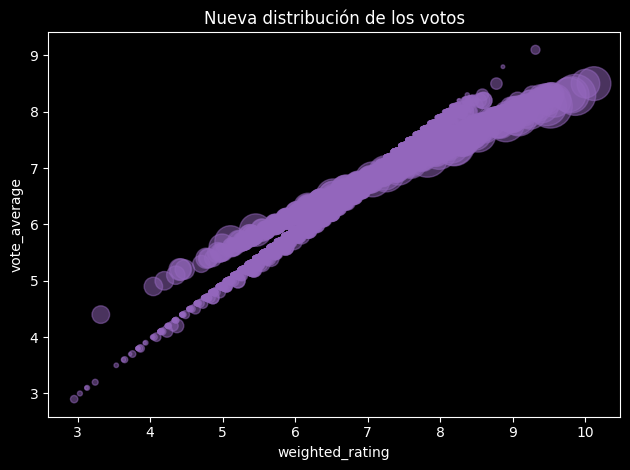

In [ ]:
min_size = 5   # Tamaño mínimo de la burbuja
max_size = 1000 # Tamaño máximo de la burbuja
scaled_size = min_size + (df['vote_count'] - df['vote_count'].min()) / (df['vote_count'].max() - df['vote_count'].min()) * (max_size - min_size)
plt.scatter(df['weighted_rating'], df['vote_average'], s=scaled_size, alpha=0.5, color='tab:purple')
plt.title('Nueva distribución de los votos')
plt.xlabel('weighted_rating')
plt.ylabel('vote_average')

plt.tight_layout()
plt.show()

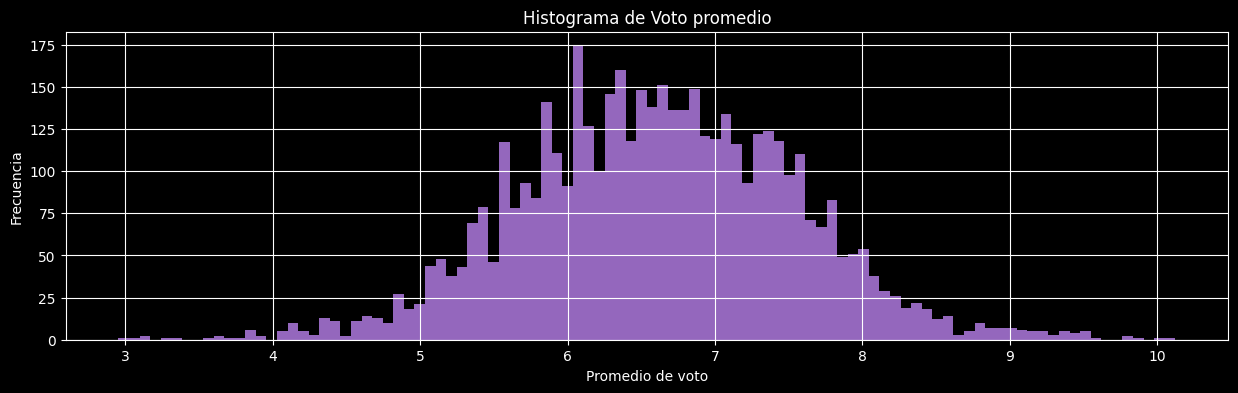

In [ ]:
plt.figure(figsize=(15,4))
df['weighted_rating'].hist(bins=100,color='tab:purple')
plt.xlabel('Promedio de voto')
plt.ylabel('Frecuencia')
plt.title('Histograma de Voto promedio')
plt.show()

In [ ]:
df.describe()

,release_year,runtime,vote_average,vote_count,weighted_rating
count,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000
mean,2002.168603,107.851046,6.464652,894.353687,6.608897
std,14.645714,25.544113,0.840100,1274.944437,0.935700
min,1902.000000,0.000000,2.900000,150.000000,2.953066
25%,1997.000000,95.000000,5.900000,237.000000,5.971832
50%,2007.000000,105.000000,6.500000,411.000000,6.602507
75%,2012.000000,118.000000,7.100000,949.000000,7.262048
max,2017.000000,705.000000,9.100000,14075.000000,10.123414


In [ ]:
df.drop(['vote_average', 'vote_count'], axis = 1, inplace = True)

In [ ]:
condiciones = [
    (df['weighted_rating'] > 0) & (df['weighted_rating'] < 4),
    (df['weighted_rating'] >= 4) & (df['weighted_rating'] < 6),
    (df['weighted_rating'] >= 6) & (df['weighted_rating'] < 9),
    (df['weighted_rating'] >= 9) ]

valores = ['mala', 'regular', 'buena', 'excelente']
df['weighted_rating'] = np.select(condiciones, valores, default = df['weighted_rating'])

In [ ]:
df.drop(df[df['weighted_rating'] == 'mala'].index, inplace=True) # Para no recomendar peliculas consideradas malas

In [ ]:
df['weighted_rating'].value_counts()

weighted_rating
buena        3461
regular      1210
excelente      43
Name: count, dtype: int64

#### Runtime
> Como se ven en el describe las duraciones van desde 0 a 1256 minutos (más de 20 horas). Es por eso que se va a reclasificar:

>> **Hasta 2 horas:** De menos de 120 minutos son películas cortas (o sin datos pero se acepta el error)

>> **Entre 2 y 3 horas:** De 120 a 180 minutos son películas medias

>> **De más de 3 horas:** De 180 son películas largas


In [ ]:
df['runtime'].fillna(0, inplace=True)

In [ ]:
df['runtime'].describe()

count    4714.000000
mean      107.905388
std        25.574029
min         0.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       705.000000
Name: runtime, dtype: float64

In [ ]:
df.drop(df[df['runtime'] > 240].index, inplace=True) # Se va a considerar que una película puede durar máximo 4 horas para no considerarse miniserie

In [ ]:
df['runtime'].describe()

count    4709.000000
mean      107.469314
std        21.475059
min         0.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       238.000000
Name: runtime, dtype: float64

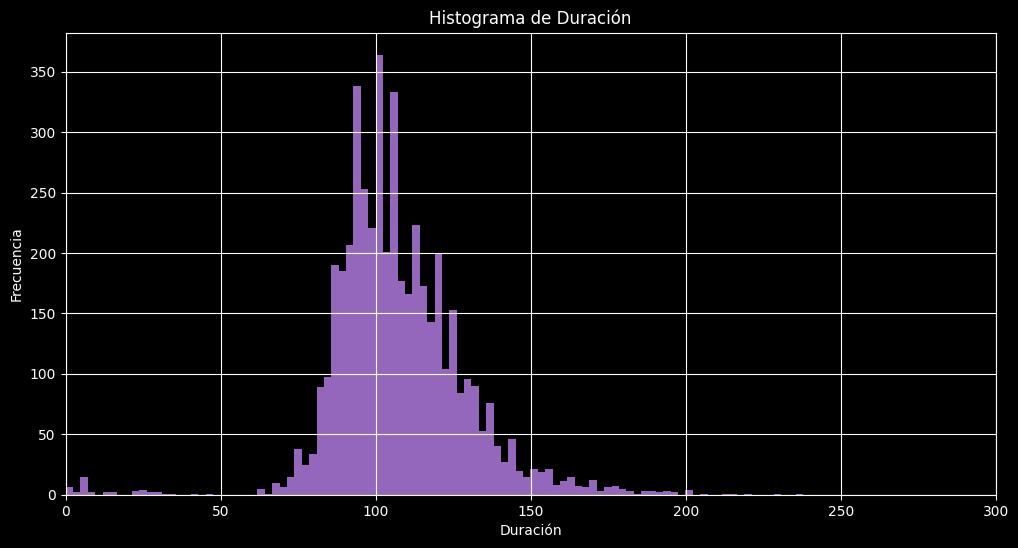

In [ ]:
plt.figure(figsize=(12,6))
df['runtime'].hist(bins=100,color='tab:purple')
plt.xlim(0, 300)
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración')
plt.show()

In [ ]:
condiciones = [
    (df['runtime'] < 120.0),
    (df['runtime'] >= 120.0) & (df['runtime'] < 180.0),
    (df['runtime'] >= 180.0)]

valores = ['corta', 'media', 'larga']

df['runtime'] = np.select(condiciones, valores, default=df['runtime'])


In [ ]:
df['runtime'].value_counts()

runtime
corta    3605
media    1074
larga      30
Name: count, dtype: int64

In [ ]:
df.head()

,title,cast,director,release_year,genres,runtime,overview,weighted_rating
0,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,1995,"['Animation', 'Comedy', 'Family']",corta,"Led by Woody, Andy's toys live happily in his ...",buena
1,Jumanji,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,1995,"['Adventure', 'Fantasy', 'Family']",corta,When siblings Judy and Peter discover an encha...,buena
4,Father of the Bride Part II,"['Steve Martin', 'Diane Keaton', 'Martin Short']",Charles Shyer,1995,['Comedy'],corta,Just when George Banks has recovered from his ...,regular
5,Heat,"['Al Pacino', 'Robert De Niro', 'Val Kilmer']",Michael Mann,1995,"['Action', 'Crime', 'Drama', 'Thriller']",media,"Obsessive master thief, Neil McCauley leads a ...",buena
8,Sudden Death,"['Jean-Claude Van Damme', 'Powers Boothe', 'Do...",Peter Hyams,1995,"['Action', 'Adventure', 'Thriller']",corta,International action superstar Jean Claude Van...,regular


#### Release year
> Parte importante de una pelicula es el contexto y la tecnologia con la que se grabó, es por eso que se van a clasificar segun la década (teniendo en cuanta que el dataset llega hasta 2017)

>> **20s**: Veintes

>> **30s**: treintas

>> **40s**: Cuarentas

>> **50s**: Cincuentas

>> **60s**: Sesentas

>> **70s**: Setentas

>> **80s**: Ochentas

>> **90s**: Noventas

>> **2000s**: Dosmil

>> **2010**: actuales

In [ ]:
df.drop(df[df['release_year'] < 1920].index, inplace=True) # se consideran películas de hasta un siglo de antigüedad

In [ ]:
df['release_year'].describe()

count    4708.000000
mean     2002.175658
std        14.601088
min      1920.000000
25%      1997.000000
50%      2007.000000
75%      2012.000000
max      2017.000000
Name: release_year, dtype: float64

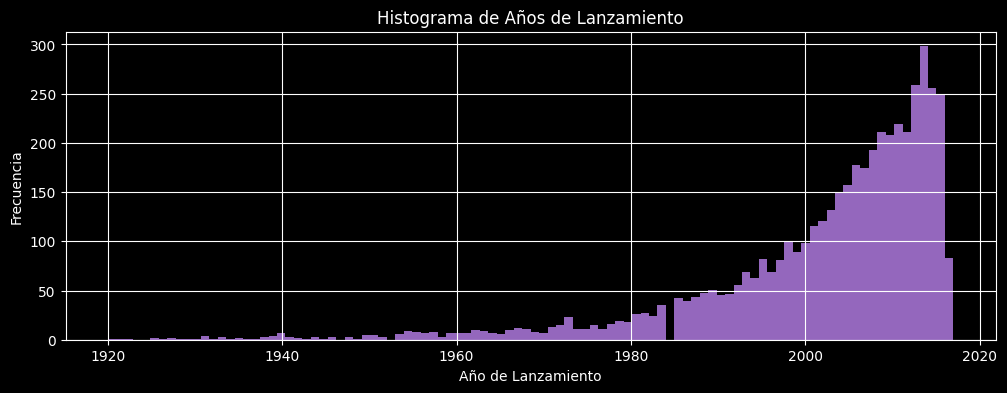

In [ ]:
plt.figure(figsize=(12,4))
df['release_year'].hist(bins=100,color='tab:purple')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años de Lanzamiento')
plt.show()

In [ ]:
condiciones = [
    (df['release_year'] >= 1920) & (df['release_year'] < 1930),
    (df['release_year'] >= 1930) & (df['release_year'] < 1940),
    (df['release_year'] >= 1940) & (df['release_year'] < 1950),
    (df['release_year'] >= 1950) & (df['release_year'] < 1960),
    (df['release_year'] >= 1960) & (df['release_year'] < 1970),
    (df['release_year'] >= 1970) & (df['release_year'] < 1980),
    (df['release_year'] >= 1980) & (df['release_year'] < 1990),
    (df['release_year'] >= 1990) & (df['release_year'] < 2000),
    (df['release_year'] >= 2000) & (df['release_year'] < 2010),
    (df['release_year'] >= 2010)
]

valores = ['veintes', 'treintas', 'cuarentas', 'cincuentas', 'sesentas', 'setentas', 'ochentas', 'noventas', 'dosmil', 'actuales']
df['release_year'] = np.select(condiciones, valores, default = df['release_year'])


In [ ]:
print(df['release_year'].value_counts())

release_year
actuales      1783
dosmil        1529
noventas       700
ochentas       352
setentas       141
sesentas        87
cincuentas      61
cuarentas       24
treintas        21
veintes         10
Name: count, dtype: int64


In [ ]:
df.head()

,title,cast,director,release_year,genres,runtime,overview,weighted_rating
0,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,noventas,"['Animation', 'Comedy', 'Family']",corta,"Led by Woody, Andy's toys live happily in his ...",buena
1,Jumanji,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,noventas,"['Adventure', 'Fantasy', 'Family']",corta,When siblings Judy and Peter discover an encha...,buena
4,Father of the Bride Part II,"['Steve Martin', 'Diane Keaton', 'Martin Short']",Charles Shyer,noventas,['Comedy'],corta,Just when George Banks has recovered from his ...,regular
5,Heat,"['Al Pacino', 'Robert De Niro', 'Val Kilmer']",Michael Mann,noventas,"['Action', 'Crime', 'Drama', 'Thriller']",media,"Obsessive master thief, Neil McCauley leads a ...",buena
8,Sudden Death,"['Jean-Claude Van Damme', 'Powers Boothe', 'Do...",Peter Hyams,noventas,"['Action', 'Adventure', 'Thriller']",corta,International action superstar Jean Claude Van...,regular


### Campos cualitativos

In [ ]:
df.head(1)

,title,cast,director,release_year,genres,runtime,overview,weighted_rating
0,Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,noventas,"['Animation', 'Comedy', 'Family']",corta,"Led by Woody, Andy's toys live happily in his ...",buena


#### Cast, Director y Genres
> Se limpian los [''] y se sacan los **espacios** para que el nombre y apellido de un actor sean una sola palabra, porque que dos actores tengan el mismo apellido no deberia afectar la similitud entre peliculas.

In [ ]:
df['director'] = df['director'].fillna("-")

In [ ]:
df['cast'] = df['cast'].apply(lambda x: x.split(',')[0]) # Guardamos solo el actor principal para disminuir el peso de los datos

In [ ]:
df['cast'] = df['cast'].apply(lambda x: x.strip('[]').replace("'", "").replace(" ", "").replace(",", " "))
df['genres'] = df['genres'].apply(lambda x: x.strip('[]').replace("'", "").replace(",", " "))
df['director'] = df['director'].apply(lambda x: x.replace(" ", ""))

In [ ]:
df.head()

,title,cast,director,release_year,genres,runtime,overview,weighted_rating
0,Toy Story,TomHanks,JohnLasseter,noventas,Animation Comedy Family,corta,"Led by Woody, Andy's toys live happily in his ...",buena
1,Jumanji,RobinWilliams,JoeJohnston,noventas,Adventure Fantasy Family,corta,When siblings Judy and Peter discover an encha...,buena
4,Father of the Bride Part II,SteveMartin,CharlesShyer,noventas,Comedy,corta,Just when George Banks has recovered from his ...,regular
5,Heat,AlPacino,MichaelMann,noventas,Action Crime Drama Thriller,media,"Obsessive master thief, Neil McCauley leads a ...",buena
8,Sudden Death,Jean-ClaudeVanDamme,PeterHyams,noventas,Action Adventure Thriller,corta,International action superstar Jean Claude Van...,regular


#### Overview
A esta columna se le debe hacer todo el procesamiento, sacar las stopwords y se hace más eficiente si se seleccionan solo algunas palabras más representativas.

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    if isinstance(text, float) and pd.isna(text):
        return ""  # Devolver cadena vacía si el texto es NaN
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación y caracteres no alfanuméricos
    text = text.lower()  # Convertir a minúsculas
    tokens = word_tokenize(text)  # Tokenizar
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Eliminar stop words y lematizar
    return ' '.join(tokens)  # Unir tokens de nuevo en una sola cadena

In [ ]:
df['cleaned_overview'] = df['overview'].apply(preprocess_text)

In [ ]:
df[['overview', 'cleaned_overview']]

,overview,cleaned_overview
0,"Led by Woody, Andy's toys live happily in his ...",led woody andys toy live happily room andys bi...
1,When siblings Judy and Peter discover an encha...,sibling judy peter discover enchanted board ga...
4,Just when George Banks has recovered from his ...,george bank recovered daughter wedding receive...
5,"Obsessive master thief, Neil McCauley leads a ...",obsessive master thief neil mccauley lead topn...
8,International action superstar Jean Claude Van...,international action superstar jean claude van...
...,...,...
45137,"Brice is back. The world has changed, but not ...",brice back world changed best friend marius ca...
45163,Four girlfriends take a trip to New Orleans fo...,four girlfriend take trip new orleans annual f...
45217,When the pressure to be royal becomes too much...,pressure royal becomes much mal return isle lo...
45228,Franky and Krimo dream of leaving the grey gri...,franky krimo dream leaving grey grime neighbor...


In [ ]:
df.drop(['overview'], axis = 1, inplace = True)

In [ ]:
print(df['cleaned_overview'][0])

led woody andys toy live happily room andys birthday brings buzz lightyear onto scene afraid losing place andys heart woody plot buzz circumstance separate buzz woody owner duo eventually learns put aside difference


In [ ]:
df['cleaned_overview'] = df['cleaned_overview'].fillna("-")
df['cleaned_overview'] = df['cleaned_overview'].str.replace("\n", " ")

In [ ]:
!pip install summa

In [ ]:
from summa import keywords

In [ ]:
palabras_clave_lista = []
for index, row in df.iterrows():
    texto = row['cleaned_overview']
    try:
        palabras_clave = keywords.keywords(texto, words=10).replace("\n", " ")  # Intenta extraer 10 palabras clave por texto
    except IndexError:
        try:
          palabras_clave = keywords.keywords(texto, words=5).replace("\n", " ")  # Intenta extraer 5 palabras clave por texto
        except IndexError:
          palabras_clave = []  # En caso de error, asigna una lista vacía


    palabras_clave_lista.append(palabras_clave)

df['palabras_clave'] = palabras_clave_lista


In [ ]:
print(df['palabras_clave'][0])
print(df['cleaned_overview'][0])


woody andys buzz duo eventually difference afraid losing place
led woody andys toy live happily room andys birthday brings buzz lightyear onto scene afraid losing place andys heart woody plot buzz circumstance separate buzz woody owner duo eventually learns put aside difference


In [ ]:
df_expanded = df['cleaned_overview'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True)
overview_counts=df_expanded.value_counts()

df_expanded2 = df['palabras_clave'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True)
claves_counts=df_expanded2.value_counts()


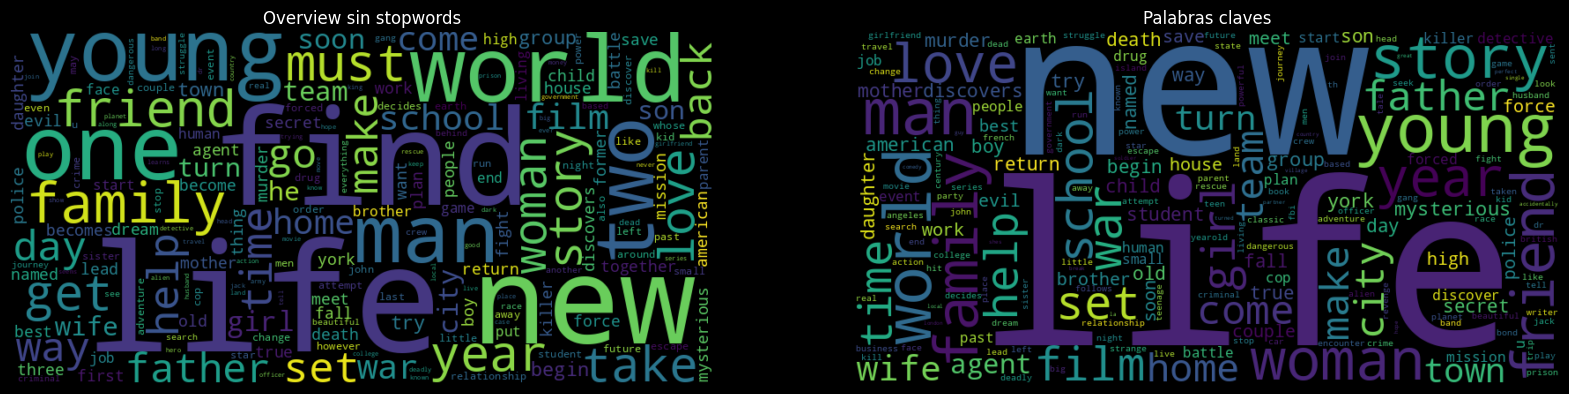

In [ ]:
wordcloud1 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(overview_counts)
wordcloud2 = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(claves_counts)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Mostrar la primera nube de palabras en la primera subplot
axs[0].imshow(wordcloud1, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Overview sin stopwords')

# Mostrar la segunda nube de palabras en la segunda subplot
axs[1].imshow(wordcloud2, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Palabras claves')

# Mostrar la figura completa
plt.show()

## Dataset final

In [ ]:
df

,title,cast,director,release_year,genres,runtime,weighted_rating,cleaned_overview,palabras_clave
0,Toy Story,TomHanks,JohnLasseter,noventas,Animation Comedy Family,corta,buena,led woody andys toy live happily room andys bi...,woody andys buzz duo eventually difference afr...
1,Jumanji,RobinWilliams,JoeJohnston,noventas,Adventure Fantasy Family,corta,buena,sibling judy peter discover enchanted board ga...,game alan alans giant rhinoceros evil monkey t...
4,Father of the Bride Part II,SteveMartin,CharlesShyer,noventas,Comedy,corta,regular,george bank recovered daughter wedding receive...,george planning plan arrival grandchild recove...
5,Heat,AlPacino,MichaelMann,noventas,Action Crime Drama Thriller,media,buena,obsessive master thief neil mccauley lead topn...,obsessive master thief neil mccauley lead topn...
8,Sudden Death,Jean-ClaudeVanDamme,PeterHyams,noventas,Action Adventure Thriller,corta,regular,international action superstar jean claude van...,game set van damme daughter action superstar i...
...,...,...,...,...,...,...,...,...,...
45137,Brice 3,JeanDujardin,JamesHuth,actuales,Comedy,corta,regular,brice back world changed best friend marius ca...,adventure world changed best friend travel sha...
45163,Girls Trip,ReginaHall,MalcolmD.Lee,actuales,Comedy,media,buena,four girlfriend take trip new orleans annual f...,trip new orleans annual festival way rediscove...
45217,Descendants 2,DoveCameron,KennyOrtega,actuales,TV Movie Family Action Comedy Music Adven...,corta,buena,pressure royal becomes much mal return isle lo...,pressure royal lost archenemy uma ursulas daug...
45228,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",RamzyBedia,FranckGastambide,actuales,Comedy,corta,regular,franky krimo dream leaving grey grime neighbor...,thai dream leaving grey grime vacation transfo...


In [ ]:
df.dtypes

title               object
cast                object
director            object
release_year        object
genres              object
runtime             object
weighted_rating     object
cleaned_overview    object
palabras_clave      object
dtype: object

In [ ]:
df['palabras_clave'] = df['palabras_clave'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [ ]:
df['tags'] = df['palabras_clave'] + " " + df['genres'] + " " + df['weighted_rating'] + " " + df['release_year'] + " " + df['runtime'] + " " + df['director'] + " " + df['cast']

In [ ]:
df['tags'][0]

'woody andys buzz duo eventually difference afraid losing place Animation  Comedy  Family buena noventas corta JohnLasseter TomHanks'

In [ ]:
df.head(1)

,title,cast,director,release_year,genres,runtime,weighted_rating,cleaned_overview,palabras_clave,tags
0,Toy Story,TomHanks,JohnLasseter,noventas,Animation Comedy Family,corta,buena,led woody andys toy live happily room andys bi...,woody andys buzz duo eventually difference afr...,woody andys buzz duo eventually difference afr...


In [ ]:
df.drop(['cast', 'director', 'release_year', 'genres', 'runtime', 'weighted_rating', 'cleaned_overview', 'palabras_clave'], axis = 1, inplace = True)

In [ ]:
df.head()

,title,tags
0,Toy Story,woody andys buzz duo eventually difference afr...
1,Jumanji,game alan alans giant rhinoceros evil monkey t...
4,Father of the Bride Part II,george planning plan arrival grandchild recove...
5,Heat,obsessive master thief neil mccauley lead topn...
8,Sudden Death,game set van damme daughter action superstar i...


In [ ]:
df.to_csv('recomendacion_df.csv', index=False)

# Algoritmo de recomendación

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cv = CountVectorizer(max_features=5000, stop_words="english")

In [ ]:
vectors = cv.fit_transform(df["tags"]).toarray()

In [ ]:
simil = cosine_similarity(vectors)

In [ ]:
np.save('vectors.npy', vectors)
np.save('simil.npy', simil)

## Prueba

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Henry/13recomendacion_df.csv")

In [ ]:
df.shape

(6010, 2)

In [ ]:
simil = np.load('/content/drive/MyDrive/Henry/1simil.npy')

In [ ]:
def recommend(title):
    df['title1'] = df['title'].str.lower()
    title1 = title.lower()
    if title1 in df['title1'].values:
        movie_index = df[df["title1"] == title1].index[0]
        distances = simil[movie_index]
        movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

        pel = []
        for i in movie_list:
            list_pel = {df.iloc[i[0]].title}
            pel.append(list_pel)
        return pel
    else:
        return(f'La película "{title}" no se encuentra en la base de datos, prueve nuevamente con otro título')

In [ ]:
recommend("Now You See Me")

[{'Takers'},
 {'The Clan'},
 {'To Steal from a Thief'},
 {'Now You See Me 2'},
 {'Wind River'}]

In [ ]:
recommend("Now you see Me")

[{'Takers'},
 {'The Clan'},
 {'To Steal from a Thief'},
 {'Now You See Me 2'},
 {'Wind River'}]

In [ ]:
recommend("Now u see Me")

'La película "Now u see Me" no se encuentra en la base de datos, prueve nuevamente con otro título'

In [ ]:
recommend("Lethal Weapon")

[{'Lethal Weapon 2'},
 {'Lethal Weapon 3'},
 {'Lethal Weapon 4'},
 {'Tequila Sunrise'},
 {'Lock Up'}]

In [ ]:
recommend('The Lion King')

[{'Beauty and the Beast: The Enchanted Christmas'},
 {"The Lion King 2: Simba's Pride"},
 {"Geri's Game"},
 {'Tarzan'},
 {'Quest for Camelot'}]

In [ ]:
recommend('Dirty Dancing')

[{'Footloose'},
 {'Tomboy'},
 {'Sixteen Candles'},
 {'The Cyclone'},
 {'Steel Magnolias'}]

In [ ]:
recommend('Batman Returns')

[{'Batman'}, {'Batman Forever'}, {'Wolf'}, {'The 13th Warrior'}, {'GoldenEye'}]

In [ ]:
recommend('Star Trek II: The Wrath of Khan')

[{'Star Trek III: The Search for Spock'},
 {'Star Trek VI: The Undiscovered Country'},
 {'Star Trek V: The Final Frontier'},
 {'Star Trek IV: The Voyage Home'},
 {'Mad Max 2: The Road Warrior'}]

In [ ]:
recommend("Rocky")

[{'Rocky IV'}, {'Rocky III'}, {'Rocky II'}, {'Rocky V'}, {'Rocky Balboa'}]